In [2]:
##########################################################################################
# Import various modules into PYTHON. These will be used throughput this Jupyter Notebook
##########################################################################################
# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import wav for reading files
from scipy.io import wavfile as wv

# import audio for playing audio
from IPython.display import Audio, display

# add path for importing modules to './data'. 
import sys
sys.path.insert(0, './data')

#######################################################################################
#
# function for easy plotting of signals with centered axis and larger figure
#
#   nicesignalplot(scale,values,caption)
#      scale:   array with vertical scale values 't' (float)
#      values:  array with signal values 'x(t)' to plot (float or complex, 
#               in latter case .real will be used)
#      caption: caption of the plot (string)
#
######################################################################################
def nicesignalplot(scale,values,caption):
    myfigure  =  plt.figure(figsize=(15,7.5))
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot( scale, values)
    plt.title('(nicesignalplot): '+caption)
    plt.show()

###########################################################################################
#
# function for easy plotting of DFT magnitude spectrum with centered axis and larger figure
#
#      nicemagspecplot(N,dftvalues,caption,hvsize, [ylabel] )
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption: caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#      ylabel = optional string for naming vertical axis. Default is |X(ω)|.
#
##########################################################################################
def nicemagspecplot(N,dftvalues,caption,hvsize,ylabel='$|X(\hat{\omega})|$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.abs(dftvalues))
    plt.title('(nicemagspecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()
    
########################################################################################
#
# function for easy plotting of DFT phase spectrum with centered axis and larger figure
#
#      nicephasespecplot(N,dftvalues,caption,hvsize, [ylabel] )
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption:    caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#      ylabel = optional string for naming vertical axis. Default is arg(X(ω)).
#
#########################################################################################
def nicephasespecplot(N,dftvalues,caption,hvsize,ylabel='arg$(X(\hat{\omega}))$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.angle(dftvalues))
    plt.title('(nicephasespecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()

<!--- Music Compression ------------------------------------------------------------------------>

<h3 style="color:blue;"> <u>MFCCs - Towards automated speech recognition</u></h3> 

Automated speech recognition, or ASR, deals with the problem of automatically recognizing spoken language. Research in ASR has produced well-established technology based on Hidden Markov Models (HMMs). In its most general formulation, the ASR problem consists of finding the sequence of words associated with a given (recorded) acoustic signal. Approaches to ASR usually follow a multi-level model. At the first level, the acoustic signal is condensed and characterized by <b>signal features</b> related to the human phonetic system, called <b>phonemes</b>. Phonemes are the most basic unit of sound in speech. The next level associates strings of phonemes to form words. The third level considers possible words in relation to each other so as to form phrases and utterances. HMMs integrate the levels so that they are all processed simultaneously.

In this part we focus on the first level, namely computing phonemes. We will investigate the conversion of the speech signal into speech features order to understand the ability of speech features to represent the similar and differences between phonemes. The diagram below shows a phonetic chart for the English language. Similar phonetic charts exist for different languages.

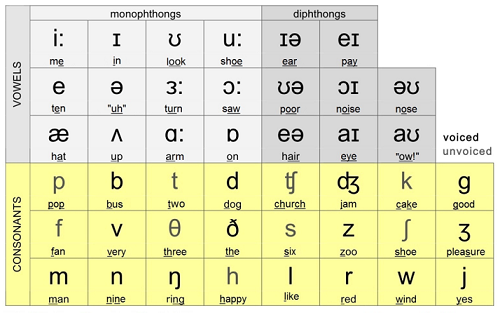

In ASR, phonemes are characterized numerically, referred to as features of the speech signal. The features used by most speech recognizers are MFCCs or “Mel Frequency Cepstral Coefficients”. The idea is that each phoneme has a distinctive set of MFCCs, hence recognizing a phoneme can – in principle –be done based on the computed MFCCs of a frame of speech. In practice, the MFCCs associated with a given phoneme are far from unique. Different recordings of the same phonemes can differ from each other due to noise, echoes, speech speed, speaker dialect, and other acoustic phenomena. The other levels of processing used by HMMs (exploiting statistics of words and language) help to resolve inherent ambiguity in the estimated phonemes/MFCCs.

We will compute MFCCs from speech signals, and find out how single phonemes can be distinguished based on the computed MFCCs.

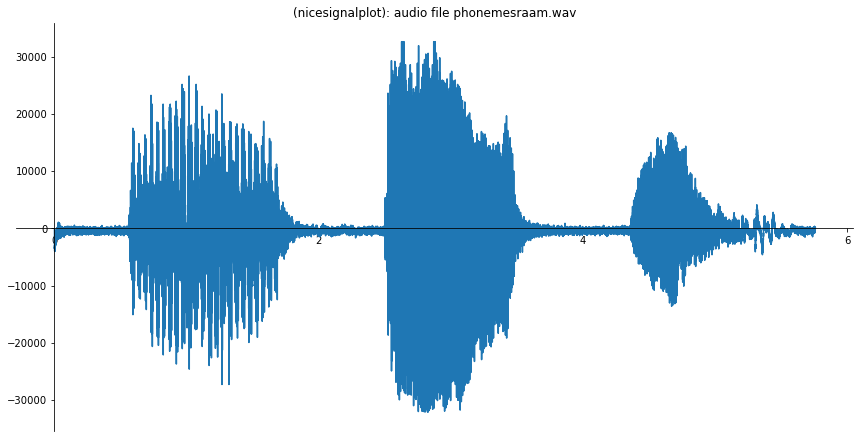

In [3]:
fs, speech = wv.read("data/phonemesraam.wav")
display(Audio(speech, rate=fs))
nicesignalplot(np.arange(0,len(speech)/fs,1/fs),speech,'audio file phonemesraam.wav')

Before splitting the speech signal into frames, it is usually high-pass filtered as so to relatively enhance the higher frequencies in the signal. Apply a high-pass FIR filter to the speech signal with impulse response $h[n] = \delta[n] - 0.95\delta(n-1)$.

In [4]:
#filter with h[n]=\delta[n] -0.95\delta[n-1]  or y[n]=x[n]-0.95x[n-1].

fspeech = np.convolve([1,-0.95],speech)

The speech signal is subdivided into <b>non-overlapping</b> frames of length $N=512$ samples. We put the frames of $N$ samples into a 2-D array (2-dimensional list) `XX(n,m)` of $N$ rows by $M$ columns (in this case $N=512$ and $M$ depends on the length of the speech signal). Each column then contains a <b>frame</b> of $N= 512$ samples. The figure below visualizes the framing process.

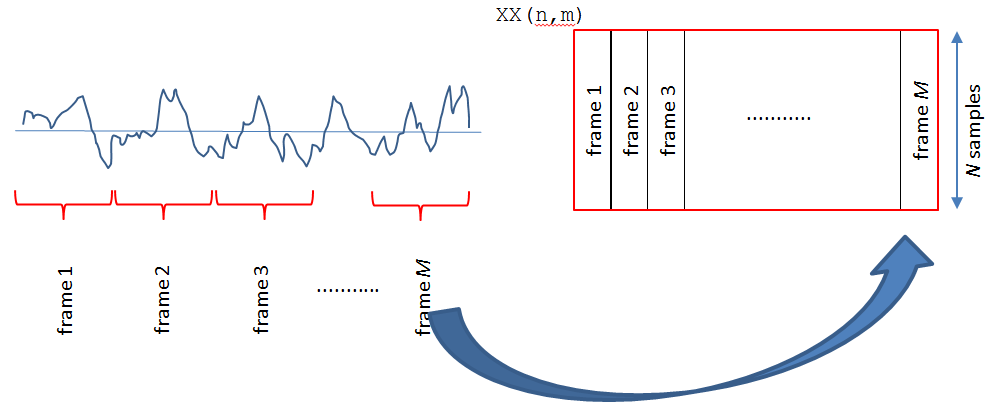

Here is a code fragment to do the framing of the filtered speech signal.


In [5]:
Nframelen1 = 512
Mframes1   = int(len(fspeech)/Nframelen1)
print('Input speech is divided into',Mframes1,'frames of length',Nframelen1)
fspeech.resize(Mframes1*Nframelen1)
frames = fspeech.reshape([Mframes1,Nframelen1]) 

Input speech is divided into 180 frames of length 512


The speech recognition process is relatively sensitive to noise that exists in silent intervals when no speech occurs. We therefore make the signal equal to zero in all frames that do not contain speech. Compute for each frame the variance using `np.var`. If the variance is smaller than a threshold `Tnoise`, make the signal in the corresponding frame equal to zero. Find a suitable threshold. Convert the signal back to a 1-D array and plot the result to verify that you only eliminated silences and not the speech signal.

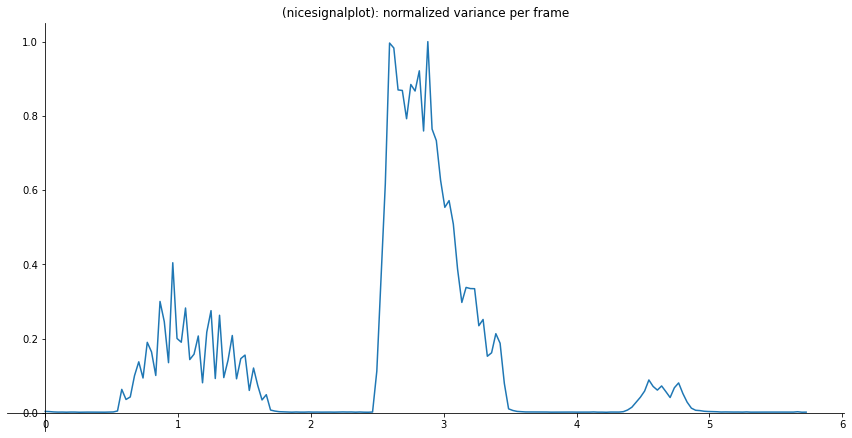

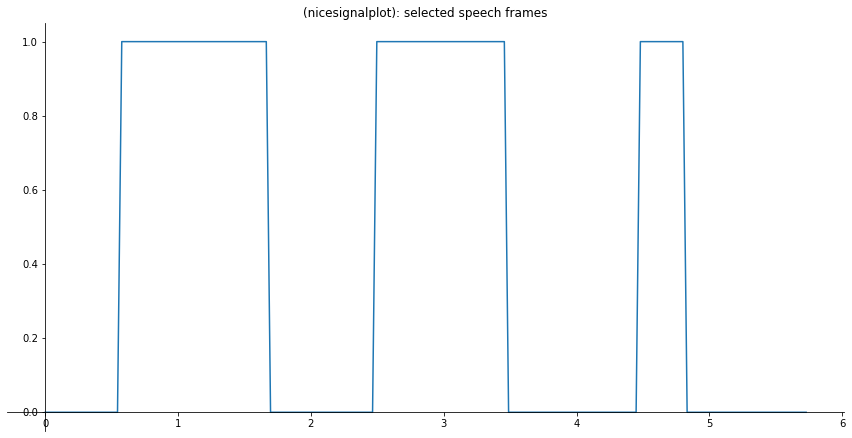

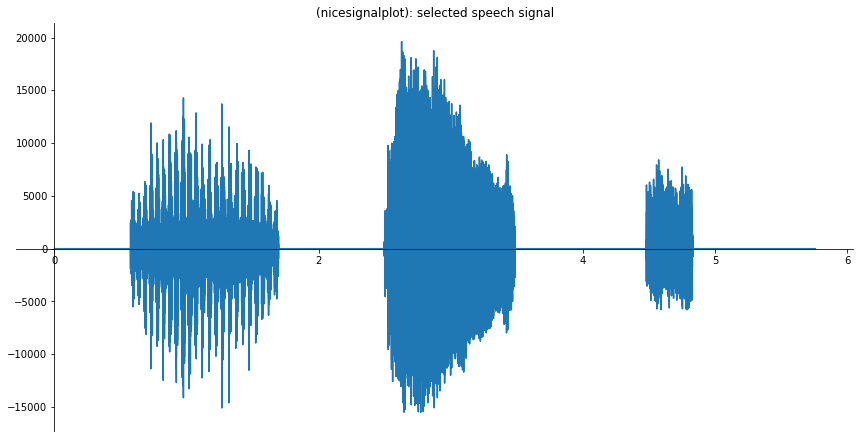

In [6]:
variances = np.var(frames,axis=1)
variances = variances/np.max(variances)
nicesignalplot(np.arange(0,Nframelen1*len(variances)/fs,Nframelen1/fs),variances,'normalized variance per frame')

Tnoise    = 0.03
variances = np.where(variances > Tnoise, 1, 0)
nicesignalplot(np.arange(0,Nframelen1*len(variances)/fs,Nframelen1/fs),variances,'selected speech frames')

frames = np.multiply(frames.T, variances).T
nicesignalplot(np.arange(0,Mframes1*Nframelen1/fs,1/fs),frames.reshape([Mframes1*Nframelen1]),'selected speech signal')

Rather than using the frames directly, they are multiplied by a so-called Hamming window of length 512. The purpose of multiplying each frame with a window is to avoid the unnatural discontinuities between head and tail of the frames due to the circular extension effects when using DFTs/FFTs. The Hamming window is defined as follows:

\begin{equation}
    w[n] = 0.54 - 0.46\cos\big(\dfrac{2\pi n}{N - 1}\big), \quad n=0, \dots, N-1.
\end{equation}

Implement the Hamming window and multiply each frame with the Hamming window. Then carry out the DFT on each of the frames, and compute the *square of the magnitude of each DFT coefficient*. Display the result (or the log of the result for better visualization) using the pseudo-color command `plt.pcolor()`.

In [ ]:
hwindow = 0.54 - 0.46*np.cos (2*np.pi*np.arange(0,Nframelen1)/(Nframelen1-1))
#nicesignalplot(np.arange(0,Nframelen),hwindow,'Hamming window')

Nexampleframe = 100    #example of frame to display
hframes = np.multiply(frames, hwindow)
print(hframes.shape)
nicesignalplot(np.arange(0,Nframelen1),frames[Nexampleframe,:],'Example speech frame before Hamming window')
nicesignalplot(np.arange(0,Nframelen1),hframes[Nexampleframe,:],'Example speech frame after Hamming window')

epsilon = 0.0001 # to avoid log(0) in pseudocolor plot
HFRAMES = np.abs(np.fft.fft(hframes))**2 + epsilon
nicemagspecplot(Nframelen1,HFRAMES[Nexampleframe,:],'Magnitude squared of DFT of example speech frame',[15,5],ylabel='$|X(\hat{\omega})|$')

plt.figure(figsize=[12,8])
plt.pcolor(np.log(HFRAMES[:,:int(Nframelen1/2)].T))
plt.title('Spectrogram of speech signal')
plt.show()

The MFCCs are computed based on perceptual weighting using logarithmic frequency band, in this case according to the Mel frequency-scale. To obtain a 24-band Mel frequency-scale, the first 257 (unique) DFT coefficients of a 512-point DFT are combined in the following way.

![PE.VII.1%28iii%29.png](attachment:PE.VII.1%28iii%29.png)

The above mapping from DFT coefficient number to Mel frequency-scale is available in the numpy matrix `data/mel_scale_band_id.pkl`. Load this matrix using the command `np.load('data/mel_scale_band_id.pkl` and inspect the relation of the loaded matrix MelScaleBandID to the above table.

In [ ]:
MelScaleBandID = np.load('data/mel_scale_band_id.pkl',allow_pickle=True)
print(MelScaleBandID)

For each frame, sum the square of the magnitude of the DFT coefficients that belong to the same Mel frequency-scale band, yielding a matrix with for each frame 24 values. Because the Mel frequency scale only considers the frequency range $[0,\pi]$ or the $N/2+1$ unique DFT coefficient in $[0,N/2]$, consider only this range of DFT valus. These resulting values are called Mel frequency-scale energies. Make use of the matrix MelScaleBandID loaded. Store the resulting `Mframes x 24` Mel frequency-scale energies as the matrix `MM`. Display the resulting array in pseudo-color.

In [ ]:
MM   = np.zeros([Mframes1,24])
for n in range(0,int(Nframelen1/2)+1):
    MM[:,MelScaleBandID[n]] += HFRAMES[:,n]
    
plt.figure(figsize=[12,8])
plt.pcolor(np.log(MM[:,:].T))
plt.title('Mel frequency-scale energies of speech signal')
plt.show()

The final <i>Mel Frequency Cepstral Coefficients </i> (MFCCs) are obtained by taking the inverse discrete cosine transform (DCT) of the logarithm of the Mel frequency-scale energies. The DCT is a transform similar to the DFT, except for the fact that it does not yield complex-valued coefficients. The inverse DCT is available in numpy as the command `scipy.fftpack.idct`. Compute the inverse DCT of the logarithm of the array `MM` that stores the `Mframes x 24` frequency-scale energies. Display the resulting array in pseudo-color.

In [ ]:
import scipy.fftpack as fft
MFCC = fft.idct(np.log10(MM))
plt.figure(figsize=[12,8])
plt.pcolor(np.abs(MFCC[:,:]).T)
plt.title('Mel frequency cepstral coefficients of speech signal')
plt.show()

In speech recognition, the first 8 to 12 computed MFCCs are then used as feature vector in recognizing series of phonemes (words and phrases) through Hidden Markov Model (HMM) estimation. HMMs are able to capture the way that the speech signal changes over time. 

Your visualization of the MFCCs should already suggest to you that a single phoneme is not static over time. In fact, as a phoneme is being pronounced, the feature vector can only be expected to be stable for approximately 10 msec. For this reason, HMMs usually using overlapping frames and also decompose a phoneme into parts, e.g., a beginning, a middle, and an end. The theory and application of HMMs is outside the scope of the course Signal Processing, and relies strongly on random processes and pattern recognition theory.

Visualizing the ability for MFCCs to distinguish between phonemes is not easy since the MFCCs are vectors in a high-dimensional space. Nevertheless, to get a feeling for how well the MFCCs can distinguish the different phonemes, we visualize the first three  MFCCs of the frames in the speech signal.

Make a 2-D scatter plot of the MFCC[0] and MFCC[1] for the different phonemes. Then make a 3D scatter  plot of the feature vector (MFCC[0], MFCC[1], MFCC[2]).

In [ ]:
myfigure = plt.figure(figsize=[8,7])
ax       = myfigure.add_subplot(1, 1, 1)
plt.scatter(MFCC[22:40,0],MFCC[22:40,1],marker='x')
plt.scatter(MFCC[80:100,0],MFCC[80:100,1],marker='s')
plt.scatter(MFCC[140:150,0],MFCC[140:150,1],marker='*')
plt.title('First two MFCC')
plt.xlabel('MFCC[0]',fontsize=16,horizontalalignment='right',x=0.95)
plt.ylabel('MFCC[1]',fontsize=16,horizontalalignment='right',y=0.95)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[8,7])
ax = fig.gca(projection='3d')
ax.plot(MFCC[22:40,0], MFCC[22:40,1], MFCC[22:40,3])
ax.plot(MFCC[80:100,0], MFCC[80:100,1], MFCC[80:100,3])
ax.plot(MFCC[140:150,0], MFCC[140:150,1], MFCC[140:150,3])
ax.set_xlabel('MFCC[0]',fontsize=8)
ax.set_ylabel('MFCC[1]',fontsize=8)
ax.set_zlabel('MFCC[2]',fontsize=8)
plt.show()

<hr style="height:3px; border:none; background-color:blue;">

<!--- Music Compression ---------------------------------------------------------------------->

We explore the principles of today’s compression algorithms such as mp3, jpeg, and the different mpeg video compression standards. The fundamental observation in all compression methods is that if a signal (music, image, video) is represented in a spectral form (i.e. in the frequency transform domain), many transform coefficient are very small and could be ignored. Hence fewer transform coefficients than samples in the original signal are needed to still get a decent perceptual quality. In most compression standards, a variation on the DFT is used, namely the DCT or Discrete Cosine Transform. In this assignment, we will use the DFT/FFT for the purpose of simplicity.

In [ ]:
fs, mmdata = wv.read("data/musicclip.wav")
display(Audio(mmdata, rate=fs))
nicesignalplot(np.arange(0,len(mmdata)/fs,1/fs),mmdata,'audio file musicclip.wav')


Most compression algorithms work with time segments (frames) or spatial segment (for instance image blocks). We therefore break up the audio into short non-overlapping frames, so that we can process each frame independently. We use as frame length of $N=512$ samples. 
Since we are going the process each frame in the Fourier domain, compute for each frame the DFT. Name the resulting 2-D array of DFT-ed frames `MMFRAMES`.

In [ ]:
N = 512
M = int(len(mmdata)/N)
mmdata.resize(N * M, refcheck = False)
MMFRAMES = mmdata.reshape([M,N])
MMFRAMES = np.fft.fft(MMFRAMES)
print(MMFRAMES.shape)
plt.figure(figsize=[12,8])
plt.pcolor(np.log(np.abs(MMFRAMES[0:100,:int(N/2)].T + 0.0001)))
plt.title('Spectrogram')
plt.show()


We now have the signal available as a collection of spectra computed on a frame-by-frame basis.  Remember that for an $N$-point DFT, we obtain $N/2+1$ unique DFT coefficients, the other $N/2-1$ coefficients can be recovered because of the complex-conjugated symmetry of the spectum. However, whereas each signal samples is real-valued, the DFT coefficients are complex numbers requiring the storage of 2 numbers (real and imaginary part) per DFT coefficient. It seems therefore that in total we have $2.(N/2+1) = N+2 $ numbers to store instead of $N$ samples. However, the DFT coefficient 0 and $N/2$ are always real-valued, ending up with exactly $N$ numbers to store.

For each frame-based spectrum in `MMFRAMES` we will keep only the $L$ largest DFT coefficients in the range $[0, \cdots, \pi] \equiv [0,\cdots,N/2]$, and ignore all other DFT coefficients by making them zero. 

Find for each frame the $L$ DFT coefficients that have the largest magnitude in the range $[0,N/2]$. A suitable Python function is, for instance, `indices=np.argsort()`. Maintain only these $L$ largest original DFT coefficients, and set all other DFT coefficients to zero. Notice that the each frame will have the largest DFT coefficients in different positions. For instance, in frame 0 the largest two DFT coeffients might be in position 0 and 3, and in frame 1 in position 2 and 8. Store the resulting DFT spectra (with now many zero DFT coefficients) in a 2-D array named `CMFRAMES`.

In [ ]:
#2*L-1 = 15
L = 10
CMFRAMES = np.zeros(MMFRAMES.shape ,dtype = 'complex_')
for i in range(MMFRAMES.shape[0]):
    indices = np.argsort(MMFRAMES[i,:])
    largest = indices[indices.shape[0] - 2*L+1: ]
    for index in largest:
        CMFRAMES[i, index] = MMFRAMES[i, index]
plt.figure(figsize=[12,8])
plt.pcolor(np.log(np.abs(CMFRAMES[0:100,:int(N/2)].T + 0.0001)))
plt.title('Spectrogram')
plt.show()


The 2-D array `CMFRAMES` contains a compressed version of the music signal, where each frame in the DFT domain is represented by only $L$ non-zero DFT coefficients (plus the corresponding complex conjugated DFT values), rather than all original DFT coefficients.

An easy way to visualize which non-zero DFT coefficients are maintained is by using a pseudo-color plot of the array `CMFRAMES`. Use the Python command `plt.pcolor(np.log(np.abs(CMFRAMES[0:100,:int(Nframelen/8)].T)+0.001))` to display the first 512/8 = 64 DFT coefficients of the first 100 frames of the 2-D array `CMFRAMES`. Different pseudo-colors indicate different magnitude/size of DFT coefficients in a frame. Study and describe the effect of using different values of $L$. 


In [ ]:

plt.pcolor(np.log(np.abs(CMFRAMES[0:100,:int(N/8)].T)+0.0001))
#plt.pcolor(np.log(np.abs(CMFRAMES[0:100,:int(Nframelen1/8)].T)+0.001))


Carry out an inverse DFT/FFT on each frame of CMFRAMES. Reshape the resulting array of compressed frames into a 1-D audio signal. Listen to the resulting compressed music for different values of $L$. 


In [ ]:
CMFRAMES = np.fft.ifft(CMFRAMES)
signal = CMFRAMES.reshape(857*512)
display(Audio(signal, rate=fs))

<!--- Voiceprint Recognition ---------------------------------------------------------------------->

  
<h3 style="color:blue;"> <u>$\boxtimes$  Voiceprint Recognition:  Music identification, at the core of Shazam & more</u></h3>  

The basics of online music identification services such as Shazam, SoundHound, Tunatic, and Nabbit is the core of this project. Music identification is based on comparing the spectrum of the query music to a database of spectra of known songs. The best matching spectrum determines which song is identified. Online music identification often involves identifying songs independently of the specific recording device, performance, artist, or even versions of the song. Here, we will focus on the problem that involves different versions of the same reference recording.

Like the compression in previous assignment, music identification is based on processing short frames of music. The way these frames are selected and which frequencies are represented in the spectrum is critical to the success of music identification. 

Rather than storing the spectrum of the songs, a highly compact binary representation is derived from the spectrum and stored, usually called the <i>fingerprint</i> of the music. In this assignment you are given a precomputed audio-fingerprint and 25 songs (actually 5 different songs, plus 4 degraded versions of each song). The challenge is to determine which of the song(s) correspond(s) to the given fingerprint.

![PA.VII.2%28i%29.png](attachment:PA.VII.2%28i%29.png)

The music identification that we develop operates with non-overlapping frames of $N=512$ samples each. If you have not done so, carry out Python exercise VII.1, such that you can convert any of the above songs into a $M \times N$ array `xx`. For the purpose of this assignment, `N=512` (the DFT/FFT will be over $N = 512$ samples) and `M = 257` (we have 257 non-overlapping frames). These array dimensions match exactly with the number of samples (namely, 131584 samples) in the audio files. 



In [ ]:

musicfiles = ['data/querysongs/query_call_me_1.wav','data/querysongs/query_call_me_2.wav',\
              'data/querysongs/query_call_me_3.wav','data/querysongs/query_call_me_4.wav',\
              'data/querysongs/query_call_me_5.wav',\
              'data/querysongs/query_get_lucky_1.wav','data/querysongs/query_get_lucky_2.wav',\
              'data/querysongs/query_get_lucky_3.wav','data/querysongs/query_get_lucky_4.wav',\
              'data/querysongs/query_get_lucky_5.wav',\
              'data/querysongs/query_scream_shout_1.wav','data/querysongs/query_scream_shout_2.wav',\
              'data/querysongs/query_scream_shout_3.wav','data/querysongs/query_scream_shout_4.wav',\
              'data/querysongs/query_scream_shout_5.wav',\
              'data/querysongs/query_locked_out_1.wav','data/querysongs/query_locked_out_2.wav',\
              'data/querysongs/query_locked_out_3.wav','data/querysongs/query_locked_out_4.wav',\
              'data/querysongs/query_locked_out_5.wav',\
              'data/querysongs/query_blurred_lines_1.wav','data/querysongs/query_blurred_lines_2.wav',\
              'data/querysongs/query_blurred_lines_3.wav','data/querysongs/query_blurred_lines_4.wav',\
              'data/querysongs/query_blurred_lines_5.wav']


fs, xx = wv.read('data/querysongs/query_blurred_lines_1.wav')
display(Audio(xx, rate=fs))
nicesignalplot(np.arange(0,len(xx)/fs,1/fs),xx,'audio file query_blurred_lines_1.wav')

Nframelen = 512
Mframes   = int(len(xx)/Nframelen)
print('Input speech is divided into',Mframes,'frames of length',Nframelen)
xx.resize(Mframes*Nframelen)
frames = xx.reshape([Mframes,Nframelen])
XX = np.fft.fft(frames)
print(XX.shape)

plt.pcolor(np.log(np.abs(XX[0:200,:int(Nframelen/8)].T)+0.001))
plt.show()


Rather than working with the magnitudes of the individual DFT/FFT coefficients, the coefficients are grouped together into 17 bands according to the so-called Bark-scale. The Bark-scale is a psychoacoustic scale proposed in 1961 by researchers of the subjective human auditory properties. The original scale represents the human auditory system in 24 critical bands of hearing. Essential to the Bark (and later proposed) scale is that it is a logarithmic scale in frequency. To obtain a 17 band Bark-scale, the first 257 (unique) DFT coefficients of a 512-point DFT are combined in the following way.

In [ ]:

BarkScaleBandID = np.load("data/bark_scale_band_id.pkl", allow_pickle = True)
print(BarkScaleBandID)


For each frame, add the (magnitude of the) DFT coefficients that belong to the same Bark-scale band, yielding a array with 17 values for each frame. These values are called Bark-scale energies. Make use of the array `BarkScaleBandID`. Store the resulting $M \times 17$  Bark-scale energies as a 2D array `BB`. Display the resulting Bark-scale energies using a pseudo-color plot.<br><br>


In [ ]:

BB   = np.zeros([Mframes,17])
for n in range(0,int(Nframelen/2)+1):
    BB[:,BarkScaleBandID[n]] += (np.abs(XX[:,n]))
plt.figure(figsize=[12,8])
plt.pcolor(np.log(BB[:200,:].T))
plt.title('Bark frequency-scale energies')
plt.show()

  <br>
The Bark-scale energies obtained are now converted/compressed into a binary representation. This representation has been chosen such that it is efficient for database queries and such that it is invariant to changes in loudness and some forms of degradations. The conversion/compression yields a $(M-1) \times 16$ elements binary fingerprint in two steps:

<ul>
<li>The difference between neighboring Bark-scale energies is computed, first in the frequency dimension and next in the temporal dimension. If $B(m,n)$ represents the 257x17 array `BB`, then the Bark-scale energy differences $e(m,n)$ are computed as follows: (for $m=0,\cdots,M-2, n=0,\cdots,15$):

\begin{equation}
   e(m,n) = \underbrace{\underbrace{(B(m+1,n+1)-B(m+1,n))}_{\mbox{difference between two neighboring} \\ \mbox{ bark scale band energies in frame m+1}}
   -\underbrace{((B(m,n+1)-B(m,n))}_{\mbox{difference between two neighboring} \\ \mbox{ bark scale band energies in frame m}}}_{\mbox{difference between two neighboring frames m+1 and m in same bark scale band n }} 
\end{equation}
<br></li>
<li> From this $(M -1) \times 16$ array, the values of the binary fingerprint are computed as follows: 

\begin{equation}
   b(m,n) = \left\{ \begin{array}{ll} 1 & \mbox{if } e(m,n) \ge 0, \\ 
                                      0 & \mbox{if } e(m,n) < 0, \end{array} \right.\quad
                                      \mbox{for } m=0,\cdots,M-2, n=0,\cdots,15.
\end{equation}
</li>

<br><br>


In [ ]:

def e(BB, m, n):
    return (BB[m+1, n+1]-BB[m+1, n]) - (BB[m, n+1]-BB[m, n])

def b(m, n, BB):
    if (e(BB, m, n) >= 0): return 1
    else: return 0

bb = np.zeros((257,17))
for m in range(0, Mframes-1):
    for n in range(0, 15):
        bb[m, n] = b(m, n, BB)

plt.figure(figsize=[12,8])
plt.pcolor(bb[:200,:].T)
plt.title('Bark frequency-scale energies')
plt.show()


Compare the loaded fingerprint with the fingerprints computed from each of the 25 music clips (listed in the above table). Count the number of differences $D$ between the fingerprint pairs, and compute the Bit Error Rate (BER) as $ BER=\frac{D}{256 \times 16}$. 

In [ ]:

data = np.load('data/fingerprint.pkl',allow_pickle=True)

BER = []
for name in musicfiles:
    fs, xx = wv.read(name)
    Nframelen = 512
    Mframes   = int(len(xx)/Nframelen)
    xx.resize(Mframes*Nframelen)
    frames = xx.reshape([Mframes,Nframelen]) 
    XX = np.fft.fft(frames)

    BB   = np.zeros([Mframes,17])
    for n in range(0,int(Nframelen/2)+1):
        BB[:,BarkScaleBandID[n]] += (np.abs(XX[:,n]))
        
    bb = np.zeros((257,17))
    for m in range(0, Mframes-1):
        for n in range(0, 15):
            bb[m, n] = b(m, n, BB)

    D=0
    for m in np.arange(0, Mframes-1):
        for n in np.arange(0, 15):
            if(bb[m,n] != data[m,n]):
                D = D + 1
    D= D / (256 * 16)
    BER.append(D)

print(np.argmin(np.array(BER)))
print(BER)